<a href="https://colab.research.google.com/github/NagaKartheekReddy/DPhi_Datathon_Challenges/blob/main/Data_Sprint_26_Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/train_set_label.csv")

In [ ]:
train_data

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.000000,136.000000,196.00000,23.871923,90.499390,5.882156,103.054809,apple
1,49.000000,69.000000,82.00000,18.315615,15.361435,7.263119,81.787105,chickpea
2,74.000000,49.000000,38.00000,23.314104,71.450905,7.488014,164.497037,jute
3,104.000000,35.000000,28.00000,27.510061,50.666872,6.983732,143.995555,coffee
4,23.000000,72.000000,84.00000,19.020613,17.131591,6.920251,79.926981,chickpea
...,...,...,...,...,...,...,...,...
1645,40.000000,17.000000,15.00000,21.350934,90.949297,7.871063,107.086209,orange
1646,40.000000,18.000000,43.00000,19.386038,86.790585,5.767373,109.913098,pomegranate
1647,35.000000,135.000000,199.00000,21.774667,80.549426,6.400720,69.396304,grapes
1648,97.000000,35.000000,26.00000,24.914610,53.741447,6.334610,166.254931,coffee


Feature: 0, Score: 0.17389
Feature: 1, Score: 0.15207
Feature: 2, Score: 0.16876
Feature: 3, Score: 0.08134
Feature: 4, Score: 0.16479
Feature: 5, Score: 0.09316
Feature: 6, Score: 0.16598


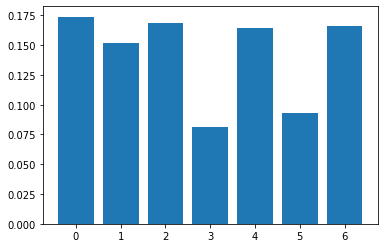

In [ ]:
from xgboost import XGBClassifier
from matplotlib import pyplot

X = train_data.drop(columns='crop')
y = train_data['crop']
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = MLPClassifier(hidden_layer_sizes=40, activation='relu', solver='lbfgs',random_state=1, max_iter=350).fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/test_set_label.csv')

In [ ]:
predicted = clf.predict(test_data)

In [ ]:
predicted

array(['mothbeans', 'cotton', 'mango', 'lentil', 'mungbean', 'coffee',
       'lentil', 'cotton', 'mothbeans', 'lentil', 'jute', 'mothbeans',
       'orange', 'banana', 'coconut', 'muskmelon', 'grapes', 'coffee',
       'watermelon', 'mungbean', 'coconut', 'rice', 'mothbeans', 'maize',
       'apple', 'orange', 'rice', 'watermelon', 'pomegranate',
       'mothbeans', 'kidneybeans', 'mungbean', 'banana', 'papaya',
       'blackgram', 'chickpea', 'kidneybeans', 'coconut', 'lentil',
       'papaya', 'grapes', 'grapes', 'rice', 'chickpea', 'grapes',
       'pigeonpeas', 'watermelon', 'pigeonpeas', 'watermelon', 'mango',
       'maize', 'mango', 'grapes', 'pigeonpeas', 'rice', 'kidneybeans',
       'apple', 'coconut', 'watermelon', 'apple', 'mungbean', 'coffee',
       'watermelon', 'mungbean', 'apple', 'kidneybeans', 'orange',
       'grapes', 'watermelon', 'coconut', 'cotton', 'pomegranate',
       'cotton', 'apple', 'maize', 'jute', 'mothbeans', 'cotton',
       'cotton', 'pigeonpeas', '

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predicted) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv', index = False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>